In [1]:
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce
from random import randint
import csv

In [2]:
def load_file(file_path):
    f = open(file_path, "r")
    f.readline()
    lines = f.readlines()
    
    values = {}
    for line in lines:
        y, x = line.strip().split(',')
        values[float(x)] = float(y)
        
    x_values = sorted(values.keys())
    y_values = [values[x] for x in x_values] 
    f.close()
    return x_values, y_values


def squared_error(true_value, calculated_value):
    return (true_value - calculated_value) ** 2


def rmse(y_values, calculated_values):
    suma = 0
    for expected, actual in zip(calculated_values, y_values):
        suma += (actual-expected) ** 2
    
    return np.sqrt(suma/len(y_values))

In [3]:
def normalize(data):
    mean = np.mean(data)
    std = np.std(data)   
    normalized_data = (data - mean) / std
    return normalized_data

In [4]:
def plot_diagram(x_values, y_values):
    plt.ylim(0, 1500)
    plt.xlim(0,10)
    plt.scatter(x_values, y_values)
    plt.show()

In [5]:
def fit(x, y):
    L = 0.01
    epochs = 1000
    n = len(y)
    
    theta = np.zeros((2,1))
    X = np.hstack((np.ones((n,1)), x.reshape(-1,1)))
    
    for i in range(epochs):
        predictions = np.dot(X, theta)
        gradient = (1/n) * np.dot(X.T, predictions - y.reshape(-1,1))
        theta = theta - L * gradient
    
    return theta

In [6]:
def predict(x, t1, t0):
    return x*t1 + t0

In [7]:
def remove_outliers_zscore(data, threshold=3):
    z_scores = (data - np.mean(data)) / np.std(data)
    abs_z_scores = np.abs(z_scores)
    filtered_data = data[abs_z_scores < threshold]
    return filtered_data

In [8]:
def filter_data(x_train, y_train, threshold=3):

    filtered_x = []
    filtered_y = []

    for x, y in zip(x_train, y_train):
        if not (y>1200 or (x>5 and y<200) or (x>3 and y<20)):
            filtered_x.append(x)
            filtered_y.append(y)
            
    print(len(filtered_x), len(x_train))
    
    return np.array(filtered_x), np.array(filtered_y)
    

In [9]:
def get_train_and_test_data(x, y):
    
    index = randint(0,4)
    index = 2
    
    x_values = [[],[],[],[],[]]
    y_values = [[],[],[],[],[]]

    for i in range(0, len(x)-6, 5):
        for j in range(5):
            x_values[j].append(x[i+j])
            y_values[j].append(y[i+j])
    
    x_train = []
    y_train = []
    
    for i in range(5):
        if i != index:
            x_train += x_values[i]
            y_train += y_values[i]
   
    x_test = x_values[index]
    y_test = y_values[index]

            
    return np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)
        
    

In [10]:
def get_train_and_test_data_2(x, y):
    lenght = int(0.8*len(x))
    x_train = x[0:lenght]
    y_train = y[0:lenght]
    
   
    x_test = x[lenght:]
    y_test = y[lenght:]

            
    return np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)

In [11]:
def batch_gradient_descent(x, y, learning_rate=0.01, num_iterations=1000):
    # Reshape x and y arrays to 2D
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    # Add a column of ones to x
    x = np.hstack((np.ones((x.shape[0], 1)), x))
    # Initialize parameters
    m, n = x.shape
    theta = np.zeros((n, 1))
    theta[0][0] = -280.0
    theta[1][0] = 150
    # Loop through iterations
    for i in range(num_iterations):
        # Compute gradient
        predictions = x.dot(theta)
        errors = predictions - y
        gradient = x.T.dot(errors) / m
        # Update parameters
        theta -= learning_rate * gradient
    return theta

In [12]:
def stochastic_gradient_descent(x, y, learning_rate=0.01, num_iterations=1000):
    # Reshape x and y arrays to 2D
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    # Add a column of ones to x
    x = np.hstack((np.ones((x.shape[0], 1)), x))
    # Initialize parameters
    m, n = x.shape
    theta = np.zeros((n, 1))
    theta[0][0] = -300.0
    theta[1][0] = 150
    # Loop through iterations
    for i in range(num_iterations):
        # Shuffle the data
        permutation = np.random.permutation(m)
        x = x[permutation]
        y = y[permutation]
        # Loop through each example
        for j in range(m):
            # Compute gradient for this example
            prediction = x[j].dot(theta)
            error = prediction - y[j]
            gradient = x[j].reshape((n, 1)) * error
            # Update parameters
            theta -= learning_rate * gradient
    return theta

In [13]:
def normal_equation(x_values, y_values):
    x_len = len(x_values)
    x_matrix = np.column_stack((np.ones((x_len, 1)), x_values))
    y_col = y_values.reshape(-1, 1)
    y_col = y_col.astype(float)
    x_transpose = np.transpose(x_matrix)
    x_matrix = x_matrix.astype(float)
    x_transpose = x_transpose.astype(float)
    inverse = np.linalg.inv(np.dot(x_transpose, x_matrix))
    teta = np.dot(np.dot(inverse, x_transpose), y_col)
    return teta

In [22]:
def get_rmse(x_train, y_train, x_test, y_test, fit_method):
    t0, t1 = fit_method(x_train, y_train)
    calculated_values = [predict(x_t, t1, t0)[0] for x_t in x_test]

    fig, ax = plt.subplots()

    # plot unfiltered values as scatter plot
    ax.scatter(x_test, y_test, label='Actual', color='blue', s=5)

    # plot filtered values as line plot
    ax.plot(x_test, calculated_values, label='Predicted', color='green')

    # add title and legend
    ax.legend()

    # display the plot
    plt.show()

    return rmse(y_test, calculated_values)


In [23]:
def mini_batch(x, y, learning_rate=0.01, epochs=1000, batch_size=10):
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    
    # Initialize theta and bias
    theta = np.zeros((x.shape[1], 1))
    b = 0
    
    # Number of samples
    m = x.shape[0]
    
    # Number of batches
    num_batches = m // batch_size
    
    # Loop through epochs
    for epoch in range(epochs):
        # Shuffle data
        indices = np.random.permutation(m)
        x = x[indices]
        y = y[indices]
        
        # Loop through batches
        for i in range(num_batches):
            # Get mini-batch
            start = i * batch_size
            end = (i + 1) * batch_size
            x_batch = x[start:end]
            y_batch = y[start:end]
            
            # Calculate predictions and error
            predictions = np.dot(x_batch, theta) + b
            error = predictions - y_batch
            
            # Calculate gradients
            theta_gradient = np.dot(x_batch.T, error) / batch_size
            b_gradient = np.sum(error) / batch_size
            
            # Update parameters
            theta -= learning_rate * theta_gradient
            b -= learning_rate * b_gradient
            
    return b, theta[0]

In [34]:
def test():
    
    x, y = load_file('./train.csv')
    
    filtered_x, filtered_y = filter_data(x, y, 3)
    
#     print('Start')
#     plot_diagram(x, y)
    
#     print('Filter' )
#     plot_diagram(filtered_x, filtered_y)
    
#     fig, ax = plt.subplots()

#     ax.scatter(x, y, label='Outliers', color='red', s=5)

#     # plot filtered values as scatter plot
#     ax.scatter(filtered_x, filtered_y, color='blue', s=5)

#     # add title and legend
#     ax.legend()

#     # display the plot
#     plt.show()
    
    x_train, y_train, x_test, y_test = get_train_and_test_data(filtered_x, filtered_y)

#     print('Training')
#     plot_diagram(x_train, y_train)
    
#     print('Test' )
#     plot_diagram(x_test, y_test)
    

    nq = get_rmse(x_train, y_train, x, y, normal_equation)

    print("Normal", nq)

    

        
#     if (st > 126):
#         print("Stochastic ALERT")
#     if (ba > 126):
#         print("Batch ALERT")
#     if (nq > 126):
#         print("Normal ALERT")
#     if (mb > 126):
#         print("Mini ALERT")
    print("-------------------------------------")
    
    


119 128


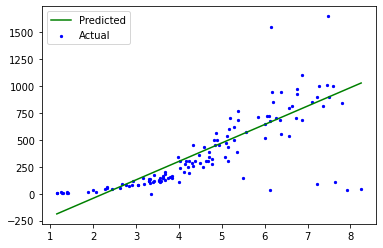

Normal 225.02811656557685
-------------------------------------
119 128


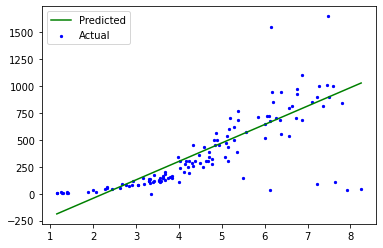

Normal 225.02811656557685
-------------------------------------
119 128


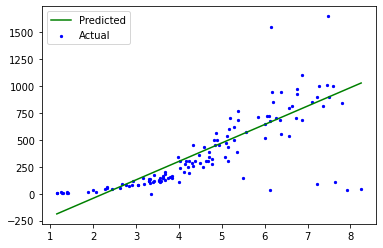

Normal 225.02811656557685
-------------------------------------
119 128


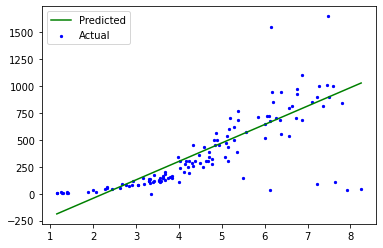

Normal 225.02811656557685
-------------------------------------
119 128


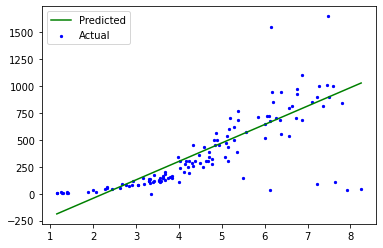

Normal 225.02811656557685
-------------------------------------
119 128


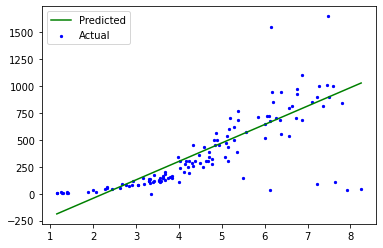

Normal 225.02811656557685
-------------------------------------
119 128


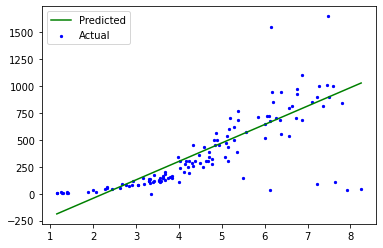

Normal 225.02811656557685
-------------------------------------
119 128


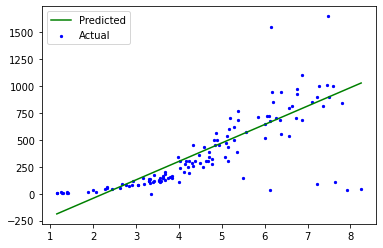

Normal 225.02811656557685
-------------------------------------
119 128


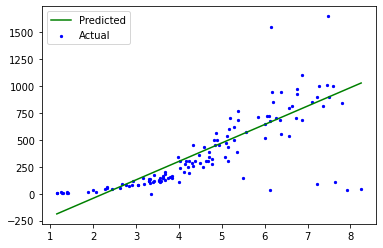

Normal 225.02811656557685
-------------------------------------
119 128


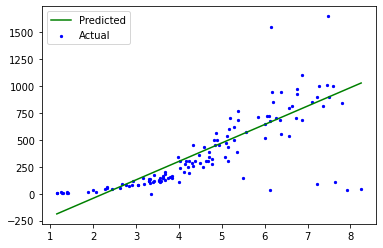

Normal 225.02811656557685
-------------------------------------


In [35]:
for i in range(10):
    test()